# Data Cleaning for PCOS Dataset

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("../data/raw/PCOS_data_without_infertility.csv")

In [74]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,#NAME?,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,#NAME?,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,#NAME?,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,#NAME?,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    object 
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

# 1. Gereksiz değişkenler

541 örnek ve 45 sütunlu bir veri seti.

    * "Sl. No", "Patient File No." -> id gibi, gereksiz ve silinmeli

    * "Unnamed: 44" -> sadece 2 dolu değer var: "." ve "7", anlamsız ve silinmeli


In [76]:
df["Unnamed: 44"].value_counts()

Unnamed: 44
.    1
7    1
Name: count, dtype: int64

In [77]:
df["Unnamed: 44"].isna().sum()

np.int64(539)

In [78]:
# ilk 2 ve son kolon silinecek
df = df.drop(["Sl. No", "Patient File No.", "Unnamed: 44"], axis=1)

# 2. Değişken isimlendirmeleri

İsimlendirmeler, büyük harf, boşluk ve parantez içinde birim değerleri gibi okumayı zorlaştıran bir formatta yazılmış. Bunları küçük harfli ve "_" ile ayrılmış bir forma dönüştürüyorum.

In [79]:
new_column_names = ['pcos', 'age', 'weight', 'height', 'bmi',
       'blood_group', 'pulse_rate', 'breaths', 'hb',
       'cycle', 'cycle_length', 'marriage',
       'pregnant', 'aborptions', 'beta_hcg_1',
       'beta_hcg_2', 'fsh', 'lh', 'fsh_lh_ratio',
       'hip', 'waist', 'waist_hip_ratio', 'tsh',
       'amh', 'prl', 'vit_d3', 'prg',
       'rbs', 'weight_gain', 'hair_growth',
       'skin_darkening', 'hair_loss', 'pimples',
       'fastfood', 'exercise', 'systolic',
       'diastolic', 'follicle_l', 'follicle_r',
       'mean_fol_size_l', 'mean_fol_size_r', 'endometrium']

In [80]:
df.columns = new_column_names

# 3. Değişken bazlı kontroller

Birbirinden farklı sorunlar içeren değişkenler için ayrı ayrı inceleme yapıp, her birine özel verilmiş kararlarla düzeltme uygun.

## 3.1. "pcos" değişkeni



"pcos", veri setinin bağımlı değişkeni. 

Veri hafif dengesiz bir veri: "Mildly Imbalanced"

Yapılması gerekenler:

    1. F1-score, precision-recall curve veya AUX-ROC değerleri ile değerlendirme yap, accuracy'ye çok güvenme

    2. Veriyi eğitim-test serisi olarak bölerken "stratify" parametresini kullan

    3. class_weight = 'balanced' parametresini kullan

    4. Opsiyonel: SMOTE ile pozitif sınıfı artırmayı düşün

Grafik gösterimler ve dengesiz veri işlemleri için başka bir notebook ile çalışılacak. Bu notebook sadece veriyi temizleme ile ilgili.


In [81]:
df.pcos.value_counts()

pcos
0    364
1    177
Name: count, dtype: int64

## 3.2. "age" değişkeni


Sorun gözükmüyor. 20-48 yaş arası kadınlardan oluşuyor. Bu yaş grubu fertilite yaş aralığında.

In [82]:
# Uç değer, veri tipi ve dağılım kontrolü
df.age.describe()

count    541.000000
mean      31.430684
std        5.411006
min       20.000000
25%       28.000000
50%       31.000000
75%       35.000000
max       48.000000
Name: age, dtype: float64

In [83]:
# Eksik veri kontrolü
df.age.isna().sum()

np.int64(0)

## 3.3. "weight", "height" ve "bmi" değişkenleri

"weight" ve "height" de sorun yok gibi: min ve max değerleri fizyolojik sınırlarda, ortalama ve medyan birbirine yakın.Ancak "bmi" object olarak görülüyor. 299 değer "#NAME?" şeklinde. Yapılan işlem bu şekilde bir hataya sebep olmuş. 

Boy, kilo ve BMI değerlerinin birlikte olması Çoklu Doğrusallık
denen aynı veriyi iki kez vermekle ilgili bir sorun var.
* Regresyon modellerinde bu durum ciddi bir sorundur. Katsayılar
kararsızlaşır ve hangi değişkenin hedefi ne kadar etkilediği anlaşılamaz.
* Ağaç tabanlı modeller bundan etkilenmez. Sadece gereksiz bir 
işlem yüküne sebep olurlar.

Ne yapılabilir:
1. Boy ve kiloyu tutup BMI sütunu silinebilir -> regresyon kullanılacaksa bu mantıklı
2. Boy ve kiloyu silip sadece BMI tutmak, ağaç modellerde işi kolaylaştırır
3. Hepsini tutmak, bilgi tekrarı (redundancy) yaratır, modelin genelleme yeteneği düşebilir.

Alan bilgisi kullanarak:
PCOS'de yüksek BMI sendromun önemli bir göstergesidir.
Tıbbi veri setlerinde Özellik Mühendisliği (Feature Engineering) 
yaparken, veriyi uzmanlık alanına (tıbba) uygun hale getirmek 
modelin başarısını artırır:
    1. Eksik BMI değerlerini kilo / boy **2 ile doldur
    2. BMI değerlerini dağılım olarak kontrol et, sıkıntılı değer var mı?
    3. Boy ve kilo değerlerini sil

Karar, boy ve kilo değişkenini kullanmaktansa sadece "bmi" değişkenini hesaplayıp kullanmak şeklinde oldu. PCOS'da BMI değeri özellikle anlamlı, boy ve kilo tek başına yeterli olmaz. Boyut küçültme de yapılmış oluyor.

In [84]:
df[["weight","height","bmi"]].isna().sum()

weight    0
height    0
bmi       0
dtype: int64

In [85]:
df[["weight","height","bmi"]].describe()

,weight,height
count,541.000000,541.000000
mean,59.637153,156.484835
std,11.028287,6.033545
min,31.000000,137.000000
25%,52.000000,152.000000
50%,59.000000,156.000000
75%,65.000000,160.000000
max,108.000000,180.000000


In [86]:
# Değerleri gözden geçirelim:
df.bmi.value_counts()

bmi
#NAME?    299
26         10
24.4        8
25.1        7
23.1        7
         ... 
29.5        1
32          1
27.9        1
24.9        1
18.5        1
Name: count, Length: 108, dtype: int64

In [87]:
# Tüm BMI değelerini tekrardan hesaplama
df["bmi_"] = df["weight"] / ((df["height"] * 0.01)**2)

In [88]:
# boy, kilo ve eski bmi değişkenlerini silme
df = df.drop(["weight","height","bmi"], axis=1)

In [89]:
# karışıklık olmaması için yeni değişkeni bmi olarak adlandırma
df = df.rename(columns={"bmi_":"bmi"})

In [90]:
df["bmi"].describe()

count    541.000000
mean      24.319360
std        4.050810
min       12.417882
25%       21.707923
50%       24.238227
75%       26.638918
max       38.900714
Name: bmi, dtype: float64

## 3.4. "blood_group" değişkeni

In [91]:
# veri setinde görünümü
kan_gruplari = {"A+":11,"A-":12,"B+":13, "B-":14, "0+":15, "0-":16, "AB+":17, "AB-":18}

In [92]:
# değişkeni kategorik hale getirmek için
reverse_grup = {v: k for k,v in kan_gruplari.items()}

In [93]:
# değiştirme
df["blood_group"] = df["blood_group"].map(reverse_grup)

In [94]:
# yeni hali
df["blood_group"].value_counts()

blood_group
0+     206
B+     135
A+     108
AB+     42
0-      19
B-      16
A-      13
AB-      2
Name: count, dtype: int64

In [95]:
# one hot encoding
df = pd.get_dummies(df, columns=["blood_group"], drop_first=True)

In [96]:
# Değişkenin yeni hali; boolean olarak görünmesinde sorun yok
df.iloc[:5, -10:]

,mean_fol_size_r,endometrium,bmi,blood_group_0-,blood_group_A+,blood_group_A-,blood_group_AB+,blood_group_AB-,blood_group_B+,blood_group_B-
0,18.0,8.5,19.304017,False,False,False,False,False,False,False
1,14.0,3.7,24.921163,False,False,False,False,False,False,False
2,20.0,10.0,25.270891,False,True,False,False,False,False,False
3,14.0,7.5,29.674945,False,False,False,False,False,True,False
4,14.0,7.0,20.060954,False,True,False,False,False,False,False


## 3.5. "pulse_rate" değişkeni

Fizyolojik olamayacak iki değer var: 18 ve 13. Bu değerleri ortalama ile değiştirdim.

In [97]:
df.pulse_rate.value_counts()

pulse_rate
72    273
74    101
78     60
70     45
80     29
73     17
75      7
76      4
82      3
18      1
13      1
Name: count, dtype: int64

In [98]:
mean_pulse = int(df["pulse_rate"].mean())
df.loc[df["pulse_rate"] < 40, "pulse_rate"] = mean_pulse

## 3.6. "marriage" değişkeni

In [99]:
# 1 tane eksik vri var.
df.marriage.isna().sum()

np.int64(1)

In [100]:
# Doğrudan ortalama ile doldurmak yerine 
# evlilik süresinin yaşla ilikli olduğu düşünülerek, o yaş grubunun 
# ortalaması ile değiştirildi.
df[df.marriage.isna()]

,pcos,age,pulse_rate,breaths,hb,cycle,cycle_length,marriage,pregnant,aborptions,...,mean_fol_size_r,endometrium,bmi,blood_group_0-,blood_group_A+,blood_group_A-,blood_group_AB+,blood_group_AB-,blood_group_B+,blood_group_B-
458,1,36,72,20,11.0,4,7,NaN,0,0,...,19.0,8.0,25.148605,False,False,False,False,False,False,False


In [101]:
age_36 = df[df["age"]==36]
marr_mean_36 = age_36["marriage"].mean()
marr_mean_36 = np.round(marr_mean_36, 1 )
marr_mean_36

np.float64(10.6)

In [102]:
# 36 yaş için evlilik süresi ortalama 10.6 yılmış.
df.loc[df["marriage"].isna(), "marriage"] = marr_mean_36

In [103]:
# Eğer genel ortalama kullansaydık, 7.6 ile dolduracaktık.
df["marriage"].mean()

np.float64(7.686321626617375)

## 3.7. "beta_hcg" değişkenleri

"beta_hcg_1", float olarak gözükürken, "beta_hcg_2" object. İki sebep bulundu: boşluk değerileri ve "1.99." şeklindeki bir değer

In [104]:
df.beta_hcg_1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 541 entries, 0 to 540
Series name: beta_hcg_1
Non-Null Count  Dtype  
--------------  -----  
541 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


In [105]:
df.beta_hcg_2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 541 entries, 0 to 540
Series name: beta_hcg_2
Non-Null Count  Dtype 
--------------  ----- 
541 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


In [106]:
# sayısal veri girerken bazen boşluk karekteri de girilebilir,
# bu da verini string olarak değerlendirilmesine sebep olabilir.
df["beta_hcg_2"] = df.beta_hcg_2.str.strip()

In [107]:
# Bir değere yanlışlıkla "." eklenmiş
df.loc[df["beta_hcg_2"] == "1.99.", "beta_hcg_2"] = 1.99

In [108]:
df["beta_hcg_2"] = df["beta_hcg_2"].astype("float")

## 3.8. "fsh", "lh" ve fsh_lh_ratio" değişkenleri

"fsh" ve "lh" değişkenlerinde outlier değerler var ve bunlar fizyolojik değiller. Her iki değişken için de ortalama ile düzeltme işlemi yapıyorum. Ancak outlier değerler aşırı yüksek olduğundan ortalamayı da yukarı çekiyorlar. O yüzden önce outlier'ları nan'a çevirip, sonra ortalama aldım.

"fsh_lh_ratio" değişkeni sadece 9 örnekte hesaplanmış, gerisi "#NAME?" şeklinde, bu değişken fsh ve lh değerlerinden hesaplanabilir. O yüzden veri setinden çıkartıyorum.

In [109]:
# "fsh"  tek büyük değeri 
mask_fsh = df[df.fsh > 100].index
df.iloc[mask_fsh,10:20]

,beta_hcg_1,beta_hcg_2,fsh,lh,fsh_lh_ratio,hip,waist,waist_hip_ratio,tsh,amh
329,900.6,900.6,5052.0,3.68,#NAME?,38,35,#NAME?,0.83,3.5


In [110]:
# "lh" için de tek büyük değer
mask_lh = df[df.lh > 20]["lh"].index
df.iloc[mask_lh,10:20]

,beta_hcg_1,beta_hcg_2,fsh,lh,fsh_lh_ratio,hip,waist,waist_hip_ratio,tsh,amh
455,272.78,1.99,4.33,2018.0,#NAME?,36,32,#NAME?,2.1,7.7


In [111]:
fsh_mean = df.fsh.mean()
lh_mean = df.lh.mean()
fsh_mean, lh_mean

(np.float64(14.601831792975974), np.float64(6.469918669131238))

In [112]:
df.loc[df[df.fsh > 100].index, 'fsh'] = np.nan
df.loc[df[df.lh > 100].index, 'lh'] = np.nan

In [113]:
new_fsh_mean = df.fsh.mean()
new_lh_mean = lh_mean = df.lh.mean()
new_fsh_mean, new_lh_mean

(np.float64(5.273316666666666), np.float64(2.744862962962963))

In [114]:
"""
"fsh" ve "lh" için outlierı nan yapmadan ortalamalar sırasıyla
14.6 ve 6.4 iken outlier'lar nan yapıldıktan sonra sırasıyla
5.2 ve 2.7 oldu. Fark belirgin.  
"""

'\n"fsh" ve "lh" için outlierı nan yapmadan ortalamalar sırasıyla\n14.6 ve 6.4 iken outlier\'lar nan yapıldıktan sonra sırasıyla\n5.2 ve 2.7 oldu. Fark belirgin.  \n'

In [115]:
df.loc[df["fsh"].isna(), "fsh"] = new_fsh_mean
df.loc[df["lh"].isna(), "lh"] = new_lh_mean

In [116]:
# fsh_lh_ratio değişkenini veriden çıkarttım.
df = df.drop(["fsh_lh_ratio"], axis=1)

## 3.9. "hip", "waist" ve "waist_hip_ratio" değişkenleri

"hip" ve "waist" değikenlerinde eksiklik ve sorun gözükmüyor. Ancak "fsh_lh_ratio" benzeri "waist_hip_ratio" çok az örnekte hesaplanmış gerisi boş. Bu değiişkeni veriden çıkartıyorum.

In [117]:
df.hip.info()

<class 'pandas.core.series.Series'>
RangeIndex: 541 entries, 0 to 540
Series name: hip
Non-Null Count  Dtype
--------------  -----
541 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [118]:
df.hip.describe()

count    541.000000
mean      37.992606
std        3.967920
min       26.000000
25%       36.000000
50%       38.000000
75%       40.000000
max       48.000000
Name: hip, dtype: float64

In [119]:
df.waist.info()

<class 'pandas.core.series.Series'>
RangeIndex: 541 entries, 0 to 540
Series name: waist
Non-Null Count  Dtype
--------------  -----
541 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [120]:
df.waist.describe()

count    541.000000
mean      33.841035
std        3.596894
min       24.000000
25%       32.000000
50%       34.000000
75%       36.000000
max       47.000000
Name: waist, dtype: float64

In [121]:
df.waist_hip_ratio.unique()

array(['#NAME?', '0.795', '0.782', '0.875', '0.842', '0.777', '0.864',
       '0.941', '0.923'], dtype=object)

In [122]:

df = df.drop("waist_hip_ratio", axis=1)

## 3.10. "tsh" değişkenindeki outlier değeri


 Bir tane outlier değer var. Örneğin fsh değeri  6.04, bmi değeri 29, prl 30, muhtemelen tedavisiz hipotiroidi gibi duruyor. Klinik olarak olası bir değer ve kalmalı.


In [123]:
df.tsh.describe()

count    541.000000
mean       2.981281
std        3.755532
min        0.040000
25%        1.480000
50%        2.260000
75%        3.570000
max       65.000000
Name: tsh, dtype: float64

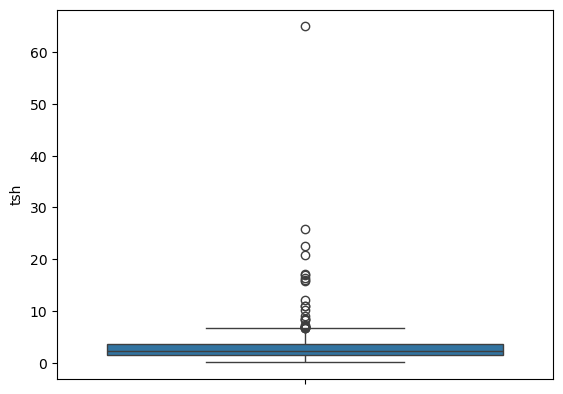

In [125]:
sns.boxplot(y="tsh", data=df)
plt.show()

In [135]:
df[df.tsh > 30]["fsh"], df[df.tsh > 30]["bmi"], df[df.tsh > 30]["prl"]

(37    6.04
 Name: fsh, dtype: float64,
 37    29.21011
 Name: bmi, dtype: float64,
 37    30.59
 Name: prl, dtype: float64)

## 3.11. "amh" değişkeni

"amh" değişkeni sayısal olması gerekirken object tipinde gözüküyor. Önce strip yaptım. Sonra tek bir "a" değerini medyan ile doldurdum.

In [136]:
df.amh.info()

<class 'pandas.core.series.Series'>
RangeIndex: 541 entries, 0 to 540
Series name: amh
Non-Null Count  Dtype 
--------------  ----- 
541 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


In [137]:
df.amh = df.amh.str.strip()

In [138]:
# Aşağıdaki kodu çalıştırdığımda, 
# ValueError: could not convert string to float: 'a' hatası verdi.
# "a" olarak işaretlenmiş değişkeni önce nan olarak işaretledim
# df.amh = df.amh.astype(np.float64)

In [139]:
df["amh"] = pd.to_numeric(df["amh"], errors="coerce")

In [ ]:
# AMH, infertilite ile ilişkili olduğundan beta_hcg değerlerine baktım
# Onlar da çok net karara uygun değillerdi. Net bir pozitif beta_hcg olsaydı
# amh değerini beta pozitiflerin medyan değeri ile dolduracaktım.
# ancak öyle olmadığı için tüm popülasyonun medyanı ile doldurdum
df[df.amh.isna()]["beta_hcg_1"], df[df.amh.isna()]["beta_hcg_2"]

(305    42.0
 Name: beta_hcg_1, dtype: float64,
 305    1.99
 Name: beta_hcg_2, dtype: float64)

In [144]:
df["amh"].fillna(df["amh"].median(), inplace=True)

In [145]:
df.amh.info()

<class 'pandas.core.series.Series'>
RangeIndex: 541 entries, 0 to 540
Series name: amh
Non-Null Count  Dtype  
--------------  -----  
541 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


## 3.12. "prl" değişkeni

    prl  değerinde fizyolojik olarak mümkün olan outlier değerler var ve eksik değer yok. 

In [146]:
df.prl.info()

<class 'pandas.core.series.Series'>
RangeIndex: 541 entries, 0 to 540
Series name: prl
Non-Null Count  Dtype  
--------------  -----  
541 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


In [147]:
df.prl.describe()

count    541.000000
mean      24.321497
std       14.970391
min        0.400000
25%       14.520000
50%       21.920000
75%       29.890000
max      128.240000
Name: prl, dtype: float64

## 3.13. "vit_d3" değişkeni

Aşırıı uç değerler ortalamayı da yukarı çekiyor. Ortalama yerine medyan değerlerle uç değerler düzeltildi.

In [148]:
df.vit_d3.info()

<class 'pandas.core.series.Series'>
RangeIndex: 541 entries, 0 to 540
Series name: vit_d3
Non-Null Count  Dtype  
--------------  -----  
541 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


<Axes: ylabel='vit_d3'>

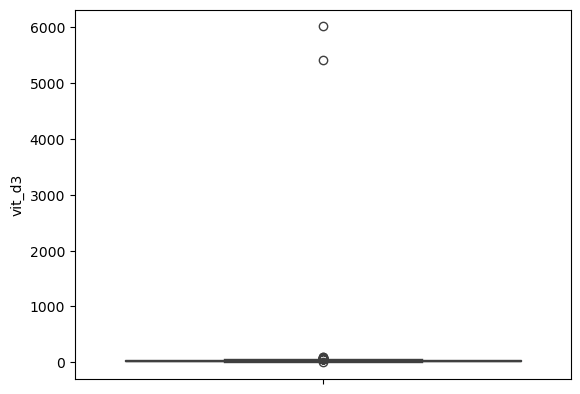

In [ ]:
# Belirgin uç değerler var ve fizyolojik değil.
sns.boxplot(y="vit_d3", data=df)

In [150]:
df.loc[df.vit_d3>100, "vit_d3"]= np.nan

In [151]:
df.vit_d3.fillna(df.vit_d3.median(), inplace=True)

<Axes: ylabel='vit_d3'>

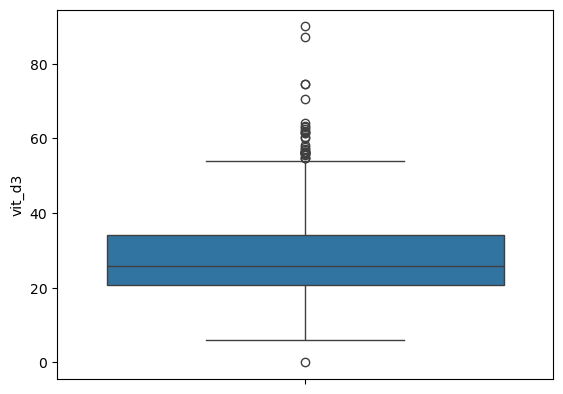

In [154]:
# "vit_d3" değişkeninin yeni dağılımı
sns.boxplot(y="vit_d3", data=df)

## 3.14. "prg" değişkeni

İki tane outlier var, bir tanesi oldukça dışarda. Ancak gebelikte progesteron değerleri yükselebiliyor ve 85 olan "prg" değerind gebelik testleri de pozitif. O yüzden bu değerler fizyolojik kabul edildi ve düzeltilmedi.

In [155]:
df[df.prg>10]["prg"]

41     85.0
484    25.3
Name: prg, dtype: float64

In [156]:
df[df.prg>10][["beta_hcg_1", "beta_hcg_2"]]

,beta_hcg_1,beta_hcg_2
41,497.41,497.41
484,1.99,1.99


## 3.15. "rbs" değişkeni

Tek bir değer outlier, ancak diabetik hastalarda olası bir değer ve PCOS'da da görülebilir.

In [157]:
df["rbs"].describe()

count    541.000000
mean      99.835860
std       18.559298
min       60.000000
25%       92.000000
50%      100.000000
75%      107.000000
max      350.000000
Name: rbs, dtype: float64

<Axes: ylabel='rbs'>

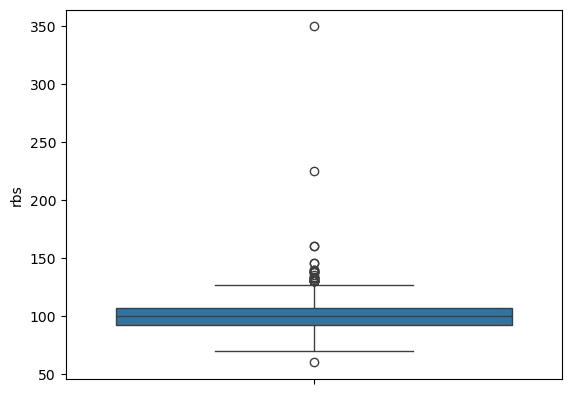

In [158]:
sns.boxplot(y="rbs", data=df)

In [162]:
# Klinik ile uyumlu gözüküyor.
df[df["rbs"]> 140][["rbs","bmi","pcos"]]

,rbs,bmi,pcos
146,160.0,31.603212,0
178,350.0,31.179138,1
230,160.0,30.730609,1
248,146.0,27.767098,1
409,146.0,23.147255,0
432,225.0,22.826881,0


## 3.16. "weight_gain", "hair_growth", "skin_darkenning", "hair_loss", "pimples", "fastfood" ve "exercise" değişkenleri


Bu değişkenler ikili kategorik değişken. 0/1 değerleri alıyorlar. Tek bir değişkende eksik veri var. Ortalama ile doldurdum.

In [167]:
df[["weight_gain", "hair_growth", "skin_darkening", "hair_loss", "pimples", "fastfood","exercise"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   weight_gain     541 non-null    int64  
 1   hair_growth     541 non-null    int64  
 2   skin_darkening  541 non-null    int64  
 3   hair_loss       541 non-null    int64  
 4   pimples         541 non-null    int64  
 5   fastfood        540 non-null    float64
 6   exercise        541 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 29.7 KB


In [169]:
df[["weight_gain", "hair_growth", "skin_darkening", "hair_loss", "pimples", "fastfood","exercise"]].isna().sum()

weight_gain       0
hair_growth       0
skin_darkening    0
hair_loss         0
pimples           0
fastfood          1
exercise          0
dtype: int64

In [172]:
for i in ["weight_gain", "hair_growth", "skin_darkening", "hair_loss", "pimples", "fastfood","exercise"]:
    print(f"{i} değişkeninin unique değerleri: {df[i].unique()}")

weight_gain değişkeninin unique değerleri: [0 1]
hair_growth değişkeninin unique değerleri: [0 1]
skin_darkening değişkeninin unique değerleri: [0 1]
hair_loss değişkeninin unique değerleri: [0 1]
pimples değişkeninin unique değerleri: [0 1]
fastfood değişkeninin unique değerleri: [ 1.  0. nan]
exercise değişkeninin unique değerleri: [0 1]


In [173]:
df.fastfood.fillna(df.fastfood.median(), inplace=True)

## 3.17. "systolic" ve "diastolic" değişkenleri

Sistol ve diastol değişkenlerinde min değerleri fizyolojik olarak beklenmeyen değerler. Her iki değişkenin ortalaması ile 8 için 80, 12 için 120 değerleri birbirlerine yakın: sırasıyla 114 ve 77. Klinikte bazen 120/80 ifadesi yerine 12/8 şeklinde bir söylem olabiliyor. O yüzden veri giriş hatası gibi değerlendirerek *10 ile veri düzeltildi.

In [174]:
df.systolic.describe()

count    541.000000
mean     114.661738
std        7.384556
min       12.000000
25%      110.000000
50%      110.000000
75%      120.000000
max      140.000000
Name: systolic, dtype: float64

In [175]:
df.diastolic.describe()

count    541.000000
mean      76.927911
std        5.574112
min        8.000000
25%       70.000000
50%       80.000000
75%       80.000000
max      100.000000
Name: diastolic, dtype: float64

In [180]:
df[(df["systolic"] < 20) | (df["diastolic"] < 20)]

,pcos,age,pulse_rate,breaths,hb,cycle,cycle_length,marriage,pregnant,aborptions,...,mean_fol_size_r,endometrium,bmi,blood_group_0-,blood_group_A+,blood_group_A-,blood_group_AB+,blood_group_AB-,blood_group_B+,blood_group_B-
161,0,38,75,20,12.5,2,5,18.0,0,3,...,12.0,5.0,24.221453,False,False,False,False,False,True,False
200,0,30,73,18,11.2,2,6,10.0,0,0,...,14.0,6.0,18.827111,False,False,False,False,False,False,False


In [181]:
df.diastolic.mean()

np.float64(76.9279112754159)

In [182]:
df.systolic.mean()

np.float64(114.66173752310536)

In [186]:
df.loc[df["systolic"] < 20, "systolic"] *= 10

In [187]:
df.loc[df["diastolic"] < 20, "diastolic"] *= 10

## 3.18. folikül ve endometrium ile ilgili değişkenler

In [190]:
df[["follicle_l", "follicle_r", "mean_fol_size_l","mean_fol_size_r","endometrium"]].isna().sum()

follicle_l         0
follicle_r         0
mean_fol_size_l    0
mean_fol_size_r    0
endometrium        0
dtype: int64

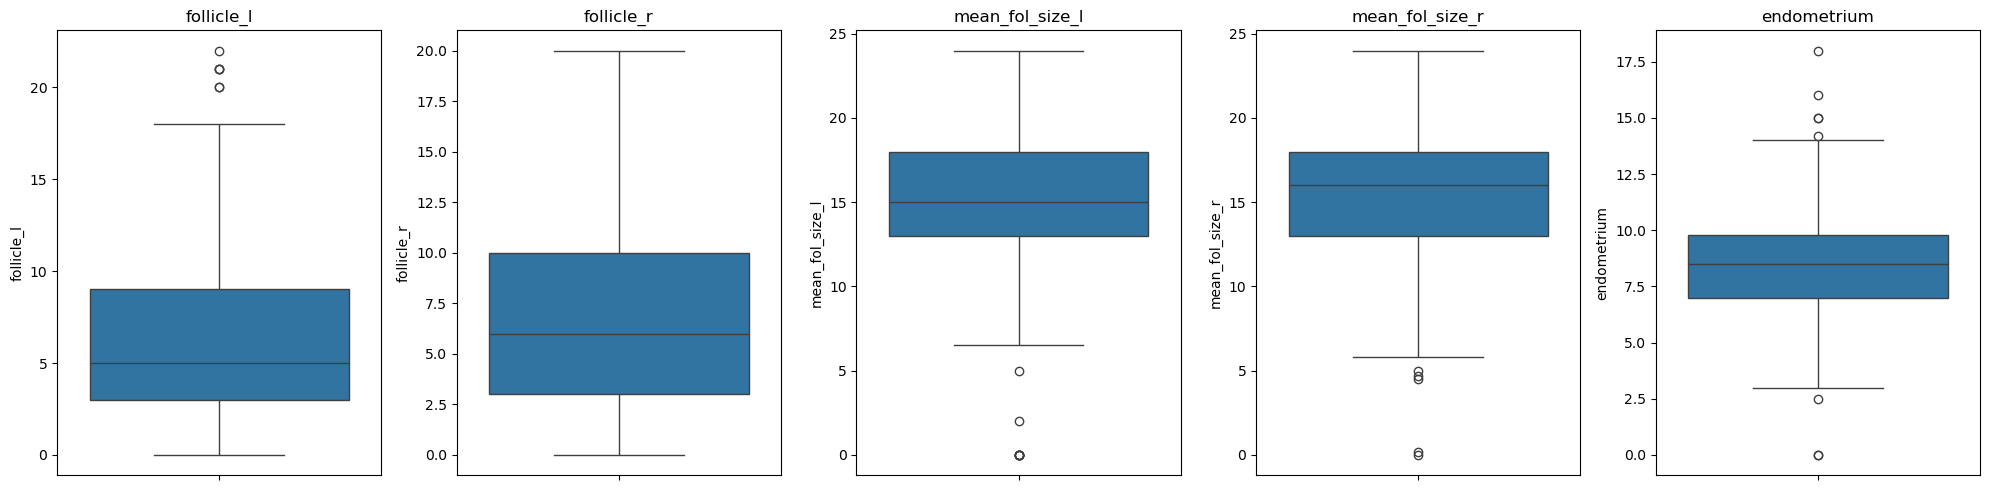

In [191]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  

for ax, col in zip(axes, ["follicle_l", "follicle_r", "mean_fol_size_l","mean_fol_size_r","endometrium"]):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

# 4. Verinin son hali

In [ ]:
# Eksik veri yok
df.isna().sum().sum()

np.int64(0)

In [ ]:
# Tüm veriler sayısal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pcos             541 non-null    int64  
 1   age              541 non-null    int64  
 2   pulse_rate       541 non-null    int64  
 3   breaths          541 non-null    int64  
 4   hb               541 non-null    float64
 5   cycle            541 non-null    int64  
 6   cycle_length     541 non-null    int64  
 7   marriage         541 non-null    float64
 8   pregnant         541 non-null    int64  
 9   aborptions       541 non-null    int64  
 10  beta_hcg_1       541 non-null    float64
 11  beta_hcg_2       541 non-null    float64
 12  fsh              541 non-null    float64
 13  lh               541 non-null    float64
 14  hip              541 non-null    int64  
 15  waist            541 non-null    int64  
 16  tsh              541 non-null    float64
 17  amh             

# 5. Temiz veriyi kaydetme

In [194]:

df.to_csv("../data/processed/pcos_cleaned.csv", index=False)